In [ ]:
pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/CSE438 Project/train_all_tasks.csv', encoding='ISO-8859-1')
df = pd.read_csv('train_all_tasks.csv', encoding='ISO-8859-1')
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
5,sexism2022_english-10376,yeah but in order to keep the benefit i have t...,not sexist,none,none
6,sexism2022_english-4569,Hahaha I just wish they would live their truth...,not sexist,none,none
7,sexism2022_english-91,head mod said she talked to him after he made ...,not sexist,none,none
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
9,sexism2022_english-16316,We most definitely did. I didnât go too much...,not sexist,none,none


In [ ]:
df.isnull().sum()

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
dtype: int64

In [ ]:
df=df.drop(['rewire_id','label_category','label_vector'], axis = 1)

In [ ]:
df.head(10)

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist
5,yeah but in order to keep the benefit i have t...,not sexist
6,Hahaha I just wish they would live their truth...,not sexist
7,head mod said she talked to him after he made ...,not sexist
8,"just the inside of your wallet: cash, bank car...",sexist
9,We most definitely did. I didnât go too much...,not sexist


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          14000 non-null  object
 1   label_sexist  14000 non-null  object
dtypes: object(2)
memory usage: 218.9+ KB


Review Rating Statistics
 sexist         3398
not sexist    10602
Name: label_sexist, dtype: int64


<Axes: ylabel='label_sexist'>

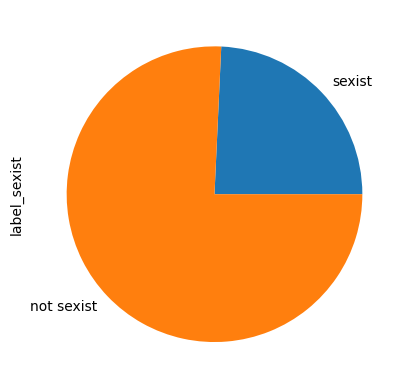

In [ ]:
reviewStats=df["label_sexist"].value_counts().sort_values()
print("Review Rating Statistics\n",reviewStats)
df["label_sexist"].value_counts().sort_values().plot.pie()

In [ ]:
df.label_sexist.value_counts()

not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64

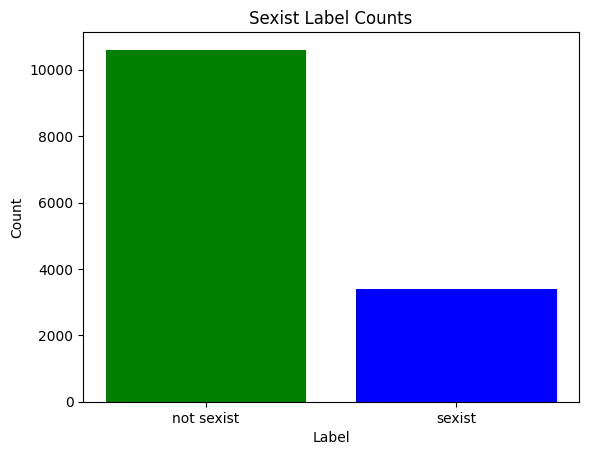

In [ ]:
colors = ['green', 'blue']
value_counts = df.label_sexist.value_counts()
plt.bar(value_counts.index, value_counts.values, color=colors)
plt.title('Sexist Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
# Separate the dataset by label
not_sexist = df[df['label_sexist'] == 'not sexist']
sexist = df[df['label_sexist'] == 'sexist']

# Determine the size of the smaller class
minority_size = min(len(not_sexist), len(sexist))

# Undersample both classes
not_sexist_sampled = not_sexist.sample(n=minority_size, random_state=42)
sexist_sampled = sexist.sample(n=minority_size, random_state=42)

# Combine the undersampled dataframes
df_sampled = pd.concat([not_sexist_sampled, sexist_sampled])

# Shuffle the combined dataframe
df_sampled = df_sampled.sample(frac=1, random_state=42)


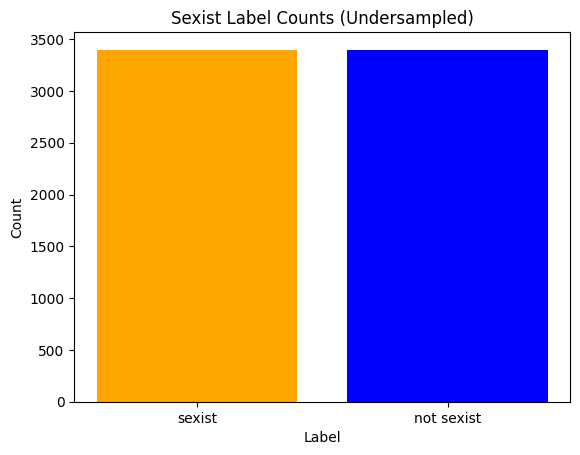

In [ ]:
import matplotlib.pyplot as plt

# Create a dataframe with the value counts
value_counts = df_sampled.label_sexist.value_counts()

# Define the colors for the bars
colors = ['orange', 'blue']

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=colors)

# Add labels and title
plt.title('Sexist Label Counts (Undersampled)')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
# df['label_sexist'] = df['label_sexist'].replace({'not sexist': 0, 'sexist': 1})

# # Verify the new column data type
# print(df['label_sexist'].dtype)


# Get length column for each text
df_sampled['text_length'] = df_sampled['text'].apply(lambda x: len(x))
df_sampled['label_sexist'] = df_sampled['label_sexist'].map({'not sexist': 0, 'sexist': 1})

msg_label = df_sampled['label_sexist'].values
df_sampled.head()

,text,label_sexist,text_length
1331,Whether or not there are any real NAWALT out t...,1,200
5219,No wonder he is having a shitty year.,0,37
5879,"maybe that is the problem, she is young and ex...",0,141
2797,Jehmu Greene is obviously lying because the fi...,1,136
8507,The Alpha among all alpha Chadâs. All chad l...,1,113


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into train, dev, and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(df_sampled['text'], df_sampled['label_sexist'], test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.2, random_state=42)

# Define pre-processing parameters
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_dev)

word_index = tokenizer.word_index
total_words = len(word_index)
total_words

# Convert text to sequences and pad them
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

dev_sequences = tokenizer.texts_to_sequences(X_dev)
dev_padded = pad_sequences(dev_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

# Define model architecture
vocab_size = 500
embedding_dim = 16
drop_value = 0.2
n_dense = 24

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
____________________________________________________

In [ ]:
# Train the model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, y_train, epochs=num_epochs, validation_data=(dev_padded, y_dev),callbacks=[early_stop],verbose=2)

Epoch 1/30
136/136 - 1s - loss: 0.6917 - accuracy: 0.5320 - val_loss: 0.6903 - val_accuracy: 0.5450 - 856ms/epoch - 6ms/step
Epoch 2/30
136/136 - 0s - loss: 0.6823 - accuracy: 0.5883 - val_loss: 0.6762 - val_accuracy: 0.5947 - 223ms/epoch - 2ms/step
Epoch 3/30
136/136 - 0s - loss: 0.6534 - accuracy: 0.6605 - val_loss: 0.6421 - val_accuracy: 0.6682 - 192ms/epoch - 1ms/step
Epoch 4/30
136/136 - 0s - loss: 0.6032 - accuracy: 0.7031 - val_loss: 0.6079 - val_accuracy: 0.6838 - 184ms/epoch - 1ms/step
Epoch 5/30
136/136 - 0s - loss: 0.5565 - accuracy: 0.7394 - val_loss: 0.5827 - val_accuracy: 0.7059 - 187ms/epoch - 1ms/step
Epoch 6/30
136/136 - 0s - loss: 0.5298 - accuracy: 0.7509 - val_loss: 0.5702 - val_accuracy: 0.7197 - 189ms/epoch - 1ms/step
Epoch 7/30
136/136 - 0s - loss: 0.5129 - accuracy: 0.7613 - val_loss: 0.5656 - val_accuracy: 0.7169 - 194ms/epoch - 1ms/step
Epoch 8/30
136/136 - 0s - loss: 0.4898 - accuracy: 0.7762 - val_loss: 0.5671 - val_accuracy: 0.7160 - 224ms/epoch - 2ms/step


In [ ]:
model.evaluate(testing_padded, y_test)

43/43 [==============================] - 0s 967us/step - loss: 0.5885 - accuracy: 0.6985


[0.58847576379776, 0.6985294222831726]

F1 Dense


In [ ]:
from sklearn.metrics import f1_score

# Make predictions on the test set
y_pred = model.predict(testing_padded)
y_pred = np.round(y_pred).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


43/43 [==============================] - 0s 750us/step
F1 score: 0.6764252696456087


In [ ]:
train_dense_results = model.evaluate(training_padded, np.asarray(y_train), verbose=2, batch_size=256)
valid_dense_results = model.evaluate(testing_padded, np.asarray(y_test), verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

17/17 - 0s - loss: 0.4557 - accuracy: 0.7877 - 261ms/epoch - 15ms/step
6/6 - 0s - loss: 0.5872 - accuracy: 0.6936 - 26ms/epoch - 4ms/step
Train accuracy: 78.77
Valid accuracy: 69.36


LSTM MODEL








In [ ]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [ ]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model1.fit(training_padded,y_train,epochs=num_epochs, validation_data=(dev_padded, y_dev),callbacks =[early_stop],verbose=2)

Epoch 1/30
136/136 - 9s - loss: 0.6934 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4917 - 9s/epoch - 63ms/step
Epoch 2/30
136/136 - 6s - loss: 0.6924 - accuracy: 0.5163 - val_loss: 0.6923 - val_accuracy: 0.5239 - 6s/epoch - 46ms/step
Epoch 3/30
136/136 - 7s - loss: 0.6955 - accuracy: 0.5379 - val_loss: 0.6869 - val_accuracy: 0.5267 - 7s/epoch - 52ms/step
Epoch 4/30
136/136 - 6s - loss: 0.6765 - accuracy: 0.5747 - val_loss: 0.6916 - val_accuracy: 0.5193 - 6s/epoch - 43ms/step
Epoch 5/30
136/136 - 7s - loss: 0.6799 - accuracy: 0.5752 - val_loss: 0.7085 - val_accuracy: 0.4908 - 7s/epoch - 50ms/step
Epoch 6/30
136/136 - 6s - loss: 0.7016 - accuracy: 0.4947 - val_loss: 0.6950 - val_accuracy: 0.5083 - 6s/epoch - 44ms/step


In [ ]:
from keras.layers import Bidirectional, LSTM, Dropout

# Define a more complex model
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model3.add(Bidirectional(LSTM(n_lstm, return_sequences=True)))
model3.add(Dropout(0.3))
model3.add(Bidirectional(LSTM(n_lstm)))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0005)  # Further adjust the learning rate

model3.compile(loss='binary_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model3.fit(training_padded, y_train, epochs=num_epochs, validation_data=(dev_padded, y_dev), callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_accuracy = model3.evaluate(testing_padded, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
136/136 - 40s - loss: 0.6895 - accuracy: 0.5205 - val_loss: 0.6741 - val_accuracy: 0.5671 - 40s/epoch - 292ms/step
Epoch 2/50
136/136 - 32s - loss: 0.6202 - accuracy: 0.6642 - val_loss: 0.6138 - val_accuracy: 0.6645 - 32s/epoch - 235ms/step
Epoch 3/50
136/136 - 35s - loss: 0.5224 - accuracy: 0.7443 - val_loss: 0.5538 - val_accuracy: 0.7224 - 35s/epoch - 261ms/step
Epoch 4/50
136/136 - 32s - loss: 0.4977 - accuracy: 0.7656 - val_loss: 0.5592 - val_accuracy: 0.7233 - 32s/epoch - 234ms/step
Epoch 5/50
136/136 - 33s - loss: 0.4802 - accuracy: 0.7760 - val_loss: 0.5436 - val_accuracy: 0.7307 - 33s/epoch - 244ms/step
Epoch 6/50
136/136 - 32s - loss: 0.4730 - accuracy: 0.7843 - val_loss: 0.5871 - val_accuracy: 0.7243 - 32s/epoch - 233ms/step
Epoch 7/50
136/136 - 34s - loss: 0.4595 - accuracy: 0.7859 - val_loss: 0.5896 - val_accuracy: 0.7261 - 34s/epoch - 251ms/step
Epoch 8/50
136/136 - 33s - loss: 0.4487 - accuracy: 0.7925 - val_loss: 0.5655 - val_accuracy: 0.7298 - 33s/epoch - 241

In [ ]:
train_lstm_results = model1.evaluate(training_padded, np.asarray(y_train), verbose=2, batch_size=256)
valid_lstm_results = model1.evaluate(testing_padded, np.asarray(y_test), verbose=2, batch_size=256)
print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_lstm_results[1]*100:0.2f}')

17/17 - 1s - loss: 0.6967 - accuracy: 0.4977 - 1s/epoch - 80ms/step
6/6 - 0s - loss: 0.6963 - accuracy: 0.4986 - 291ms/epoch - 49ms/step
Train accuracy: 49.77
Valid accuracy: 49.86


In [ ]:
model1.evaluate(testing_padded, y_test)

43/43 [==============================] - 1s 21ms/step - loss: 0.6963 - accuracy: 0.5000


[0.6963326930999756, 0.5]

F1 LSTM


In [ ]:

# Make predictions on the test set
y_pred = model1.predict(testing_padded)
y_pred = np.round(y_pred).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


43/43 [==============================] - 1s 23ms/step
F1 score: 0.002932551319648094


Bi-LSTM

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            8000      
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 156,737
Trainable params: 156,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 3)

history = model2.fit(training_padded,y_train,epochs=num_epochs, validation_data=(dev_padded, y_dev),callbacks =[early_stop],verbose=2)

Epoch 1/30
136/136 - 16s - loss: 0.6827 - accuracy: 0.5662 - val_loss: 0.7393 - val_accuracy: 0.6121 - 16s/epoch - 116ms/step
Epoch 2/30
136/136 - 12s - loss: 0.5792 - accuracy: 0.7109 - val_loss: 0.5719 - val_accuracy: 0.7197 - 12s/epoch - 85ms/step
Epoch 3/30
136/136 - 12s - loss: 0.5023 - accuracy: 0.7544 - val_loss: 0.5725 - val_accuracy: 0.7279 - 12s/epoch - 85ms/step
Epoch 4/30
136/136 - 13s - loss: 0.4844 - accuracy: 0.7659 - val_loss: 0.5701 - val_accuracy: 0.7335 - 13s/epoch - 95ms/step
Epoch 5/30
136/136 - 11s - loss: 0.4755 - accuracy: 0.7737 - val_loss: 0.5654 - val_accuracy: 0.7224 - 11s/epoch - 84ms/step
Epoch 6/30
136/136 - 11s - loss: 0.4699 - accuracy: 0.7744 - val_loss: 0.5522 - val_accuracy: 0.7417 - 11s/epoch - 84ms/step
Epoch 7/30
136/136 - 11s - loss: 0.4653 - accuracy: 0.7804 - val_loss: 0.5443 - val_accuracy: 0.7298 - 11s/epoch - 83ms/step
Epoch 8/30
136/136 - 10s - loss: 0.4607 - accuracy: 0.7817 - val_loss: 0.5607 - val_accuracy: 0.7445 - 10s/epoch - 76ms/step

In [ ]:
model2.evaluate(testing_padded, y_test)

43/43 [==============================] - 2s 38ms/step - loss: 0.5935 - accuracy: 0.7051


[0.5934826731681824, 0.7051470875740051]

F1 Bi-LSTM

In [ ]:

# Make predictions on the test set
y_pred = model2.predict(testing_padded)
y_pred = np.round(y_pred).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


43/43 [==============================] - 1s 21ms/step
F1 score: 0.6763518966908797


In [ ]:
# Comparing the four different models
print(f"Dense model loss and accuracy: {model.evaluate(testing_padded, y_test)} " )
print(f"LSTM model loss and accuracy: {model1.evaluate(testing_padded, y_test)} " )
print(f"Bi-LSTM model loss and accuracy: {model2.evaluate(testing_padded, y_test)} " )


43/43 [==============================] - 0s 921us/step - loss: 0.5872 - accuracy: 0.6912
Dense model loss and accuracy: [0.5871829986572266, 0.6911764740943909] 
43/43 [==============================] - 1s 13ms/step - loss: 0.6963 - accuracy: 0.5000
LSTM model loss and accuracy: [0.6963326930999756, 0.5] 
43/43 [==============================] - 1s 21ms/step - loss: 0.5935 - accuracy: 0.7051
Bi-LSTM model loss and accuracy: [0.5934826731681824, 0.7051470875740051] 


In [ ]:
predict_msg = ["Women are bad","Plus you meet a ton of women"]
def predict_spam(predict_msg):
  new_seq = tokenizer.texts_to_sequences(predict_msg)
  padded = pad_sequences(new_seq, maxlen = max_len,padding = padding_type,truncating = trunc_type)
  return(model2.predict(padded))
x,y=predict_spam(predict_msg)
if x>0.5:
    print(x,"The commment is sexist")
elif x<0.5:
  print(x, "The commment is not sexist")

if y>0.5:
    print(y, "The commment is sexist")
elif y<0.5:
  print(y, "The commment is not sexist")




1/1 [==============================] - 0s 34ms/step
[0.65531784] The commment is sexist
[0.3474694] The commment is not sexist
